# Exploration

In [30]:
import re
import unicodedata
import pandas as pd
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from env import get_db_url

url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()


,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
extra_stopwords = ['r', 'u', '2', 'ltgt']

def clean(text):
    
    #lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()
    
    #stopwords plus the additional ones
    stopwords = nltk.corpus.stopwords.words('english') + extra_stopwords
    
    #get
    text = (unicodedata.normalize('NFKD', text)
           .encode('ascii', 'ignore')
           .decode('utf-8', 'ignore')
           .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [7]:
ham_words = clean(' '.join(df[df.label=='ham'].text))

In [9]:
spam_words = clean(' '.join(df[df.label=='spam'].text))

In [10]:
all_words = clean(' '.join(df.text))

In [11]:
ham_freq = pd.Series(ham_words).value_counts()

In [13]:
spam_freq = pd.Series(spam_words).value_counts()

In [14]:
all_freq = pd.Series(all_words).value_counts()

In [17]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
              .set_axis(['all', 'ham', 'spam'], axis=1)
              .fillna(0)
              .apply(lambda s: s.astype(int)))

In [18]:
word_counts.head()

,all,ham,spam
0,3,0,3
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1


## 1. Spam Data

Load the spam data set.

Create and explore bigrams for the spam data. 

Visualize them with a word cloud. How do they compare with the ham bigrams?


Is there any overlap in the bigrams for the spam data and the ham data?


Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [22]:
ham_bigrams = pd.Series(nltk.ngrams(ham_words, 2))

In [23]:
ham_bigrams.value_counts()

(call, later)     52
(ill, call)       48
(let, know)       42
(sorry, ill)      39
(dont, know)      32
                  ..
(cant, ever)       1
(master, cant)     1
(dont, master)     1
(biro, dont)       1
(true, name)       1
Length: 30869, dtype: int64

In [24]:
spam_bigrams = pd.Series(nltk.ngrams(spam_words, 2))

In [25]:
spam_bigrams.value_counts()

(please, call)           44
(customer, service)      27
(po, box)                24
(a1000, cash)            23
(guaranteed, call)       23
                         ..
(extreme, dirty)          1
(listen, extreme)         1
(09090900040, listen)     1
(call, 09090900040)       1
(now1, 10p)               1
Length: 6886, dtype: int64

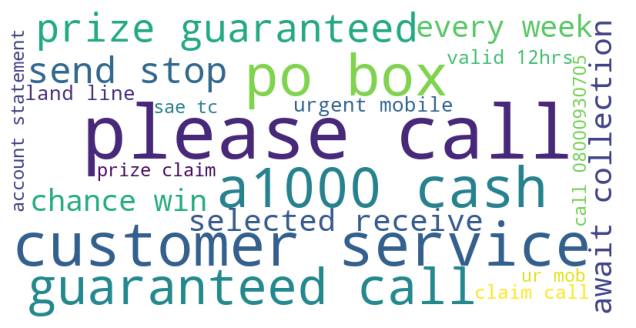

In [33]:
data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.value_counts().head(20).to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8,4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [35]:
top_20_spam_bigrams = spam_bigrams.value_counts().head(20)

<Axes: >

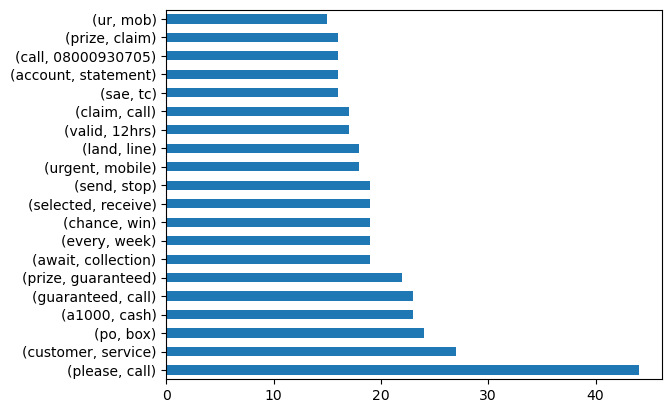

In [36]:
top_20_spam_bigrams.sort_values(ascending=False).plot.barh()

In [37]:
top_20_ham_bigrams = ham_bigrams.value_counts().head(20)

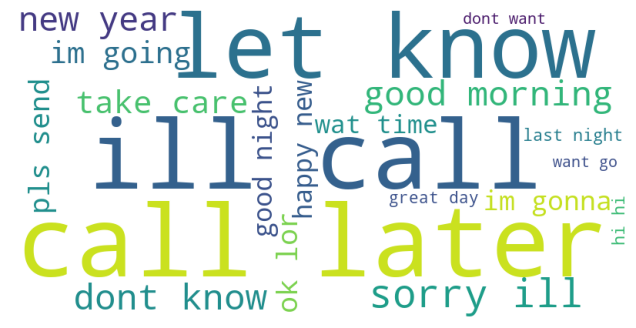

In [38]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color = 'white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8,4))
plt.imshow(img)
plt.axis('off')
plt.show()

<Axes: >

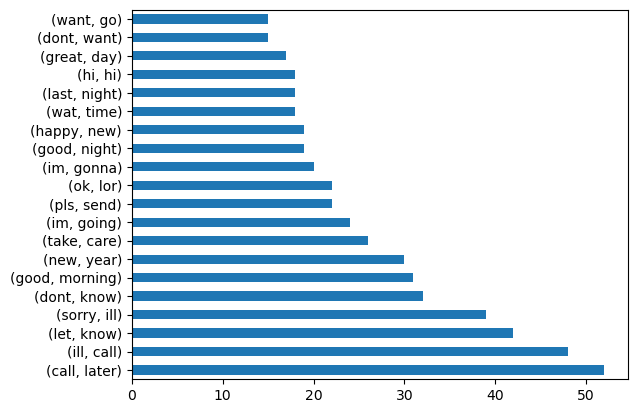

In [39]:
top_20_ham_bigrams.sort_values(ascending=False).plot.barh()